In [2]:
import numpy as np
import cv2 as cv
import os
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
path = "/Users/dtarasia/Desktop/cell-segmentation/images/"
files = os.listdir(path)
files.remove('.ipynb_checkpoints')
files.remove('.DS_Store')
files.sort()

In [4]:
img_lst = []
for i in files:
    name = os.path.join(path,i)
    img_bgr = cv.imread(name)
    img_rgb = cv.cvtColor(img_bgr,cv.COLOR_BGR2RGB)
    img_lst.append(img_rgb)

(-0.5, 1839.5, 1839.5, -0.5)

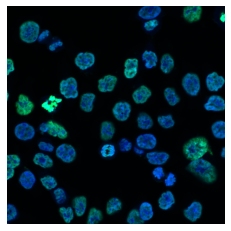

In [5]:
plt.imshow(img_lst[7])
plt.axis('off')

In [24]:
#cell_masks = []
#dna_masks = []
#imgs_filtered = []
#for (i,img_rgb) in enumerate(img_lst):
#    r,g,b = cv.split(img_rgb)
#    _,cell_mask = cv.threshold(b,40,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
#    _,dna_mask = cv.threshold(g,65,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
#    cell_masks.append(cell_mask)
#    dna_masks.append(dna_mask)
#    res = cv.bitwise_and(img_rgb,img_rgb,mask=cell_mask)
#    res_bgr = cv.cvtColor(res,cv.COLOR_RGB2BGR)
#    new_name = "/Users/dtarasia/Desktop/cell-segmentation/filtered-images/"+files[i]
#    cv.imwrite(new_name,res_bgr)
#    imgs_filtered.append(res)

In [15]:
green_low_h = int(128/2)
green_high_h = int(144/2)
green_low_s = int(0/100*255)
green_high_s = int(100/100*255)
green_low_v = int(25/100*255)
green_high_v = int(100/100*255)

low_green = np.array([green_low_h,green_low_s,green_low_v])
high_green = np.array([green_high_h,green_high_s,green_high_v])

blue_low_h = int(210/2)
blue_high_h = int(240/2)
blue_low_s = int(0/100*255)
blue_high_s = int(100/100*255)
blue_low_v = int(25/100*255)
blue_high_v = int(100/100*255)

low_blue = np.array([blue_low_h,blue_low_s,blue_low_v])
high_blue = np.array([blue_high_h,blue_high_s,blue_high_v])

cell_masks = []
dna_masks = []
cells_hsv = []
kernel_size = 550
for (i,img_rgb) in enumerate(img_lst):
    img_bgr = cv.cvtColor(img_rgb,cv.COLOR_RGB2BGR)
    img_hsv = cv.cvtColor(img_bgr,cv.COLOR_BGR2HSV)
    
    cell_mask = cv.inRange(img_hsv,low_blue,high_blue)
    dna_mask = cv.inRange(img_hsv,low_green,high_green)
    
    #cell_mask = cv.medianBlur(cell_mask,kernel_size)
    #dna_mask = cv.medianBlur(dna_mask,kernel_size)
    
    cell_masks.append(cell_mask)
    dna_masks.append(dna_mask)
    
    
    
    cv.imwrite("/Users/dtarasia/Desktop/cell-segmentation/dna_masks/"+files[i],dna_mask)
    cv.imwrite("/Users/dtarasia/Desktop/cell-segmentation/cell_masks/"+files[i],cell_mask)
    
    #cells_hsv.append(img_hsv)

In [16]:
files.index('4.jpg')

41

In [17]:
n = 25
files[n]

'24.tif'

(-0.5, 1839.5, 1839.5, -0.5)

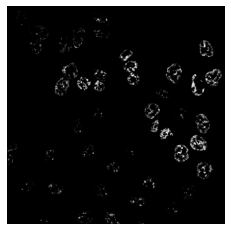

In [18]:
plt.imshow(cell_masks[n],cmap='gray')
plt.axis('off')

(-0.5, 1839.5, 1839.5, -0.5)

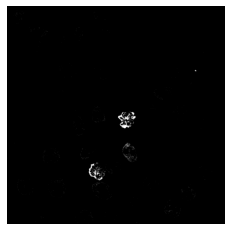

In [19]:
plt.imshow(dna_masks[n],cmap='gray')
plt.axis('off')

In [20]:
n=31

(-0.5, 1839.5, 1839.5, -0.5)

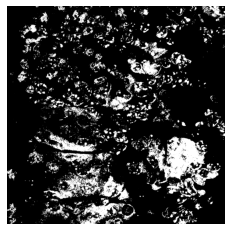

In [21]:
plt.imshow(cv.bitwise_or(cell_masks[n],dna_masks[n]),cmap='gray')
plt.axis('off')